<a href="https://colab.research.google.com/github/abiraaaaaaf/ML-DL-Python-Introduction/blob/main/Session_5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

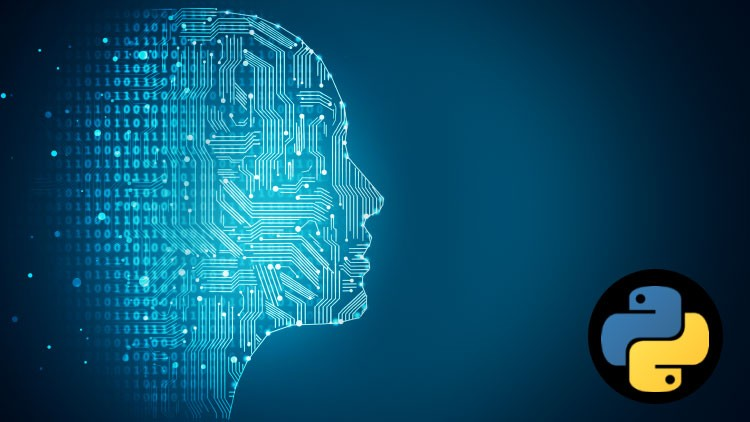

### Recap


- **Session 1**: Quick Introduction to Python
KNN Classification of iris Dataset

- **Session 2**: Pandas, Decision Tree Classification, Support Vector Classification

- **Session 3**: SVM Regression with different kernels, Decision Tree Regression, Gaussian Naive Bayes Classification, LDA

- **Session 4**: PCA, Logistic Regression, KFold Cross Validation, Ensemble Learning, Introduction to Neural Networks using PyTorch (MLP, Feed-forward, Back-propagation, Activation Function, Cross-Entropy Loss)

Built-in datasets: https://pytorch.org/vision/stable/datasets.html

In [ ]:
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms

class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )
  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

# Set fixed random number seed
torch.manual_seed(42)

# Prepare CIFAR-10 dataset
dataset = CIFAR10(os.getcwd(), download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/cifar-10-python.tar.gz to /content


In [ ]:
import os
os.getcwd()

'/content'

torch.optim options:

https://pytorch.org/docs/stable/optim.html


https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

In [ ]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [ ]:
# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')
  
  # Set current loss value
  current_loss = 0.0
  
  # Iterate over the DataLoader for training data
  for i, data in enumerate(trainloader, 0):
    
    # Get inputs
    inputs, targets = data
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Perform forward pass
    outputs = mlp(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer.step()
    
    # Print statistics
    current_loss += loss.item()
    if i % 500 == 499:
        print('Loss after mini-batch %5d: %.3f' %
              (i + 1, current_loss / 500))
        current_loss = 0.0

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch   500: 2.237
Loss after mini-batch  1000: 2.099
Loss after mini-batch  1500: 2.031
Loss after mini-batch  2000: 2.000
Loss after mini-batch  2500: 1.938
Loss after mini-batch  3000: 1.945
Loss after mini-batch  3500: 1.916
Loss after mini-batch  4000: 1.903
Loss after mini-batch  4500: 1.870
Loss after mini-batch  5000: 1.856
Starting epoch 2
Loss after mini-batch   500: 1.831
Loss after mini-batch  1000: 1.832
Loss after mini-batch  1500: 1.825
Loss after mini-batch  2000: 1.823
Loss after mini-batch  2500: 1.816
Loss after mini-batch  3000: 1.811
Loss after mini-batch  3500: 1.802
Loss after mini-batch  4000: 1.772
Loss after mini-batch  4500: 1.774
Loss after mini-batch  5000: 1.762
Starting epoch 3
Loss after mini-batch   500: 1.754
Loss after mini-batch  1000: 1.764
Loss after mini-batch  1500: 1.747
Loss after mini-batch  2000: 1.754
Loss after mini-batch  2500: 1.725
Loss after mini-batch  3000: 1.726
Loss after mini-batch  3500: 1.732
Loss

## Tensorflow

In [ ]:
# regression

import numpy as np

w0 = 0.25
b0 = 2.
x_range = [-20, 60]

def load_dataset(n=200, n_tst=200):
    np.random.seed(4)
    def s(x):
        g = (x - x_range[0]) / (x_range[1] - x_range[0])
        return 3 * (0.25 + g**2.)
    x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
    eps = np.random.randn(n) * s(x)
    y = (w0 * x * (1. + np.sin(x)) + b0) + eps
    x = x[..., np.newaxis]
    x_tst = np.linspace(*x_range, num=n_tst).astype(np.float32)
    x_tst = x_tst[..., np.newaxis]
    return y, x, x_tst

y, x, x_tst = load_dataset()

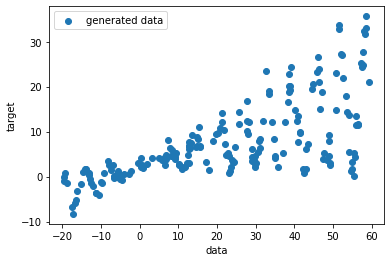

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6, 4])  # inches
plt.scatter(x, y, label='generated data')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(5, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, input_shape=(1,),  kernel_initializer='normal'))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy"])
model.fit(x, y, epochs=200, batch_size=10, verbose=0)

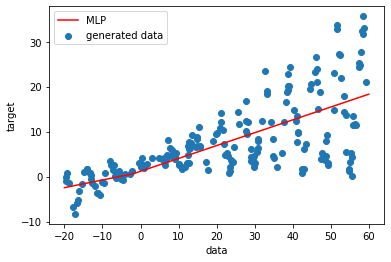

In [ ]:
#evaluation
y_pred = model.predict(x_tst)
plt.figure(figsize=[6, 4])  # inches
plt.scatter(x, y, label='generated data')
plt.plot(x_tst, y_pred, color='red', label='MLP')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()

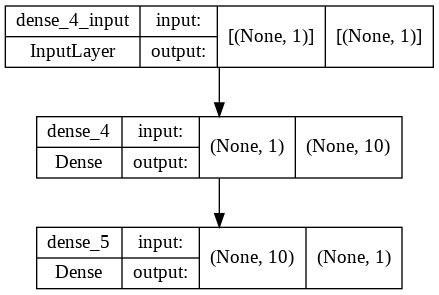

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Saving the results:

In [ ]:
import numpy as np
np.savetxt('y_pred.txt', y_pred, fmt='%s')

In [ ]:
pip install xlsxwriter

In [ ]:
import xlsxwriter
workbook = xlsxwriter.Workbook('y_pred.xlsx')
worksheet = workbook.add_worksheet('y_pred')
for i in range(len(y_pred)):
    worksheet.write('A'+str(i+2), str(y_pred[i]))
workbook.close()

###PyTorch: simple MLP

In [ ]:
import torch
import torchvision

Preparing the Dataset:

In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 64
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

TorchVision offers a lot of handy transformations, such as cropping or normalization.

In [ ]:
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))])),
  batch_size=batch_size_test, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



PyTorch's DataLoader contain a few interesting options other than the dataset and batch size. For example we could use num_workers > 1 to use subprocesses to asynchronously load data or using pinned RAM (via pin_memory) to speed up RAM to GPU transfers. But since these mostly matter when we're using a GPU we can omit them here.

Now let's take a look at some examples. We'll use the test_loader for this.

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
batch_idx, (example_data, example_targets) = next(examples)

0, ([1,2,3], [1,0,0])
1,
2,
3,


In [ ]:
example_data.shape

torch.Size([64, 1, 28, 28])

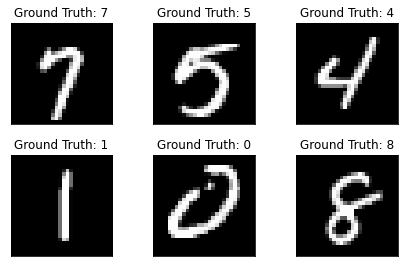

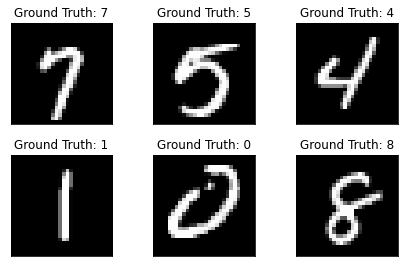

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

Building the Network:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(28*28*1, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(self.flat(x)))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)


15*1024

3*5*1024


In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

model.train() tells your model that you are training the model. So effectively layers like dropout, batchnorm etc. which behave different on the train and test procedures know what is going on and hence can behave accordingly.

In [ ]:
def train(epoch):
  network.train()

  for batch_idx, (data, target) in enumerate(train_loader):

    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)   # negative log likelihood
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:

      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      
      train_losses.append(loss.item())
      train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      
      torch.save(network.state_dict(), 'model.pth')  # Saves the state of the model as a dict
      torch.save(optimizer.state_dict(), 'optimizer.pth')  # Saves the state of the optimizer as a dict

You can call either model.eval() or model.train(mode=False) to tell that you are testing. It is somewhat intuitive to expect train function to train model but it does not do that. It just sets the mode.

In [ ]:
def test():

  network.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
      
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

In [ ]:
test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':



Test set: Avg. loss: 2.3486, Accuracy: 702/10000 (7%)



In [ ]:
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.289330
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.129544
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.900238
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.820568
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.739609
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.343252
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.215247
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.290296
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.099092
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.039805
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.870714
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.907648
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.850672
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.655093
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.004335
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.702843
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.742832
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.721207
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.510072
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.563825
Train Epoch: 1 [12800/60000 (

**TEXT CLASSIFICATION WITH THE TORCHTEXT LIBRARY**


TORCHTEXT.DATASETS: https://pytorch.org/text/stable/datasets.html

In [ ]:
import torch
from torchtext.datasets import AG_NEWS
train_iter = iter(AG_NEWS(split='train'))

29.5MB [00:00, 74.1MB/s]


In [ ]:
next(train_iter)

(3,
 "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.")

In [ ]:
next(train_iter)

(3,
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.')

Prepare data processing pipelines

torchtext.data.utils: https://pytorch.org/text/stable/data_utils.html

In [ ]:
import torchtext
from torchtext.data import get_tokenizer
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer("This is an example of get_tokenizer!")
tokens

['this', 'is', 'an', 'example', 'of', 'get_tokenizer', '!']

torchtext.vocab: https://pytorch.org/text/stable/vocab.html

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = AG_NEWS(split='train')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)   # used to return from a function without destroying the states of its local variable

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])   # Value of default index. This index will be returned when OOV token is queried.

The vocabulary block converts a list of tokens into integers.



In [ ]:
vocab(['here', 'is', 'an', 'example'])

[475, 21, 30, 5297]

In [ ]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1

The text pipeline converts a text string into a list of integers based on the lookup table defined in the vocabulary. The label pipeline converts the label into integers.

In [ ]:
text_pipeline('here is the an example')

[475, 21, 2, 30, 5297]

In [ ]:
label_pipeline('10')

9

https://pytorch.org/docs/stable/data.html

In [ ]:
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):

    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))

    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)  # cumsum: compute the cumulative sum of array elements over a given axis
    text_list = torch.cat(text_list)  # concatenate

    return label_list.to(device), text_list.to(device), offsets.to(device)

train_iter = AG_NEWS(split='train')
dataloader = DataLoader(train_iter, batch_size=8, shuffle=False, collate_fn=collate_batch)

**Define the model:**

The model is composed of the nn.EmbeddingBag layer plus a linear layer for the classification purpose. nn.EmbeddingBag with the default mode of “mean” computes the mean value of a “bag” of embeddings. Although the text entries here have different lengths, nn.EmbeddingBag module requires no padding here since the text lengths are saved in offsets.

Additionally, since nn.EmbeddingBag accumulates the average across the embeddings on the fly, nn.EmbeddingBag can enhance the performance and memory efficiency to process a sequence of tensors.

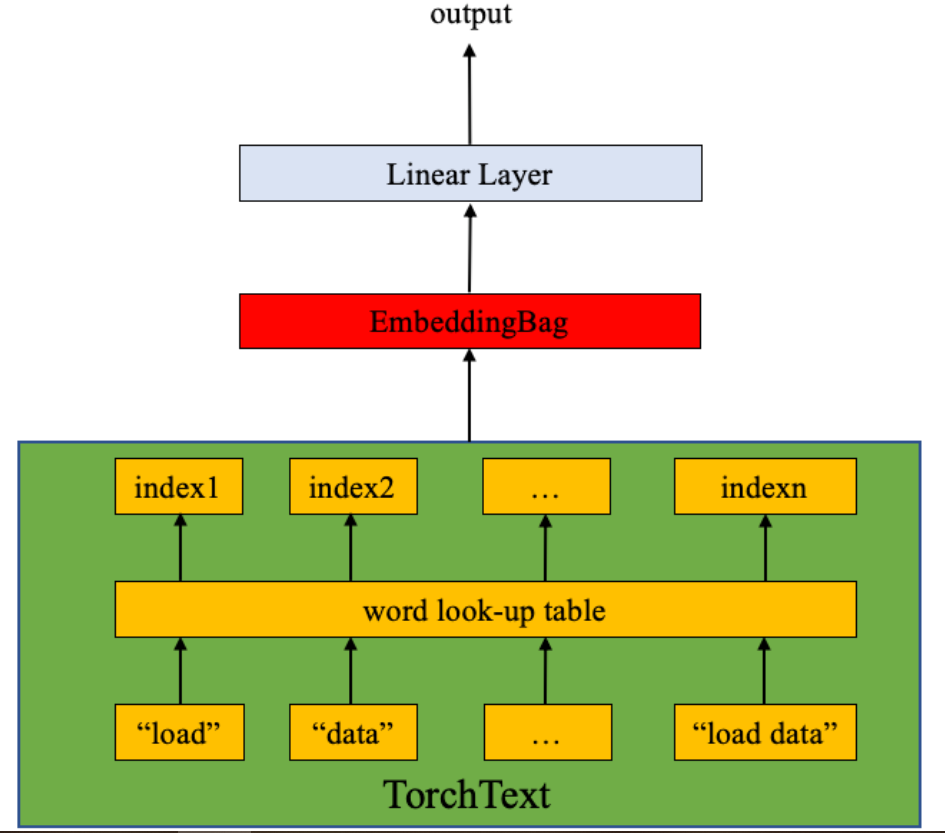

In [ ]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

**Initiate an instance**

The AG_NEWS dataset has four labels and therefore the number of classes is four.

1 : World

2 : Sports

3 : Business

4 : Sci/Tec

We build a model with the embedding dimension of 64. The vocab size is equal to the length of the vocabulary instance. The number of classes is equal to the number of labels,

In [ ]:
classes = [1,1,3,4,7,7,2,3]
set(classes)

{1, 2, 3, 4, 7}

In [ ]:
train_iter = AG_NEWS(split='train')
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

Define functions to train the model and evaluate results.

https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html

In [ ]:
import time

def train(dataloader):
    model.train()

    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():       # Torch.no_grad() deactivates autograd engine
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

**Split the dataset and run the model:**

Since the original AG_NEWS has no valid dataset, we split the training dataset into train/valid sets with a split ratio of 0.95 (train) and 0.05 (valid). Here we use torch.utils.data.dataset.random_split function in PyTorch core library.

CrossEntropyLoss criterion combines nn.LogSoftmax() and nn.NLLLoss() in a single class. It is useful when training a classification problem with C classes. SGD implements stochastic gradient descent method as the optimizer. The initial learning rate is set to 5.0. StepLR is used here to adjust the learning rate through epochs.

StepLR: https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.StepLR.html

https://pytorch.org/text/0.10.0/_modules/torchtext/data/functional.html

In [ ]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset
# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

total_accu = None
train_iter, test_iter = AG_NEWS()
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)
num_train = int(len(train_dataset) * 0.95)

split_train_, split_valid_ = random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

1.86MB [00:00, 37.4MB/s]                  


In [ ]:
for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 1782 batches | accuracy    0.686
| epoch   1 |  1000/ 1782 batches | accuracy    0.856
| epoch   1 |  1500/ 1782 batches | accuracy    0.877
-----------------------------------------------------------
| end of epoch   1 | time: 17.51s | valid accuracy    0.880 
-----------------------------------------------------------
| epoch   2 |   500/ 1782 batches | accuracy    0.899
| epoch   2 |  1000/ 1782 batches | accuracy    0.901
| epoch   2 |  1500/ 1782 batches | accuracy    0.903
-----------------------------------------------------------
| end of epoch   2 | time: 15.91s | valid accuracy    0.898 
-----------------------------------------------------------
| epoch   3 |   500/ 1782 batches | accuracy    0.916
| epoch   3 |  1000/ 1782 batches | accuracy    0.916
| epoch   3 |  1500/ 1782 batches | accuracy    0.912
-----------------------------------------------------------
| end of epoch   3 | time: 16.05s | valid accuracy    0.897 
-------------------------------

Evaluate the model with test dataset

In [ ]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.905


In [ ]:
ag_news_label = {1: "World",
                 2: "Sports",
                 3: "Business",
                 4: "Sci/Tec"}   # dictionary

def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0]))
        return output.argmax(1).item() + 1

ex_text_str = "MEMPHIS, Tenn. – Four days ago, Jon Rahm was \
    enduring the season’s worst weather conditions on Sunday at The \
    Open on his way to a closing 75 at Royal Portrush, which \
    considering the wind and the rain was a respectable showing. \
    Thursday’s first round at the WGC-FedEx St. Jude Invitational \
    was another story. With temperatures in the mid-80s and hardly any \
    wind, the Spaniard was 13 strokes better in a flawless round. \
    Thanks to his best putting performance on the PGA Tour, Rahm \
    finished with an 8-under 62 for a three-stroke lead, which \
    was even more impressive considering he’d never played the \
    front nine at TPC Southwind."

model = model.to("cpu")

print("This is a %s news" %ag_news_label[predict(ex_text_str, text_pipeline)])

This is a Sports news


##Wrap up